In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

<Figure size 432x288 with 0 Axes>

In [2]:
def plotBoundary(X, clf, mesh=True, boundary=True, type='predict'):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()

    if boundary:
        level = [0.5]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [7]:
clf = MLPClassifier()

In [8]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9210526315789473

In [9]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [11]:
for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10),
               (100,100,100,100,100,10)]:
    
    clf.hidden_layer_sizes = layers
    clf.fit(X_train, y_train)
    print("{0} hidden layers".format(len(layers)), clf.score(X_test, y_test))

1 hidden layers 0.9385964912280702
2 hidden layers 0.9649122807017544
3 hidden layers 0.9473684210526315
4 hidden layers 0.9385964912280702
5 hidden layers 0.9385964912280702
6 hidden layers 0.9473684210526315


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [13]:
clf = MLPClassifier()

In [14]:
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.9649122807017544

In [15]:
clf.alpha = 1
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.9649122807017544

In [16]:
for layers in [(100,),
               (100,10),
               (100,100,10),
               (100,100,100,10),
               (100,100,100,100,10),
               (100,100,100,100,100,10)]:
    clf.hidden_layer_sizes = layers
    clf.fit(X_train_scale, y_train)
    print("{0} hidden layers".format(len(layers)), clf.score(X_test_scale, y_test))

1 hidden layers 0.956140350877193
2 hidden layers 0.9649122807017544
3 hidden layers 0.9649122807017544
4 hidden layers 0.9649122807017544
5 hidden layers 0.9649122807017544
6 hidden layers 0.9649122807017544


1 hidden layer with 1 nodes 0.5877192982456141
1 hidden layer with 2 nodes 0.7894736842105263
1 hidden layer with 3 nodes 0.8771929824561403
1 hidden layer with 4 nodes 0.5877192982456141
1 hidden layer with 5 nodes 0.8947368421052632
1 hidden layer with 6 nodes 0.9210526315789473
1 hidden layer with 7 nodes 0.9298245614035088
1 hidden layer with 8 nodes 0.9298245614035088
1 hidden layer with 9 nodes 0.9298245614035088
1 hidden layer with 10 nodes 0.9298245614035088
1 hidden layer with 11 nodes 0.9298245614035088
1 hidden layer with 12 nodes 0.9298245614035088
1 hidden layer with 13 nodes 0.9385964912280702
1 hidden layer with 14 nodes 0.9298245614035088
1 hidden layer with 15 nodes 0.9649122807017544
1 hidden layer with 16 nodes 0.9385964912280702
1 hidden layer with 17 nodes 0.9473684210526315
1 hidden layer with 18 nodes 0.9385964912280702
1 hidden layer with 19 nodes 0.9473684210526315


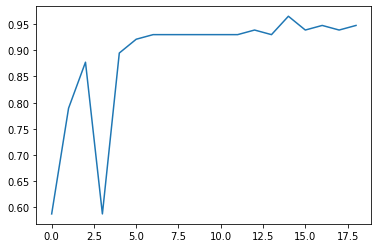

In [17]:
scores = []
for nodes in range(1, 20):
    
    clf.hidden_layer_sizes = (nodes,)
    
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print("1 hidden layer with {0} nodes".format(nodes), score)
    scores.append(score)
    
scores = np.array(scores)
plt.plot(scores)